# Visualizing Gender Gap in College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. The data set has been provided in the repository as percent-bachelors-degrees-women-usa.csv. Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics.

In this project we try to communicate the nuanced narrative of gender gap using effective data visualization.

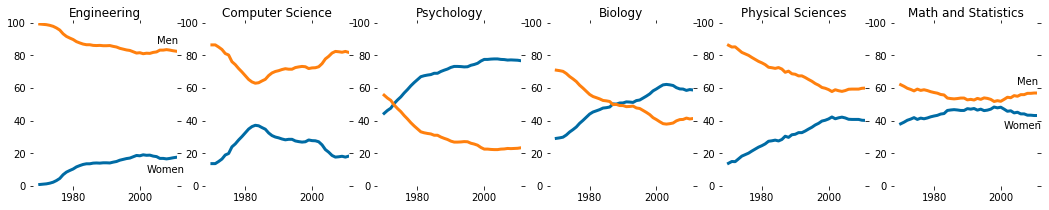

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

We extend our visualization across all degree categories. We start by dividing them into different categories as stem_cats, lib_art_cat and other_cats.

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

The first column contains the visualizations for stem_cats, the second column for lib_art_cats and the last one for other_cats.

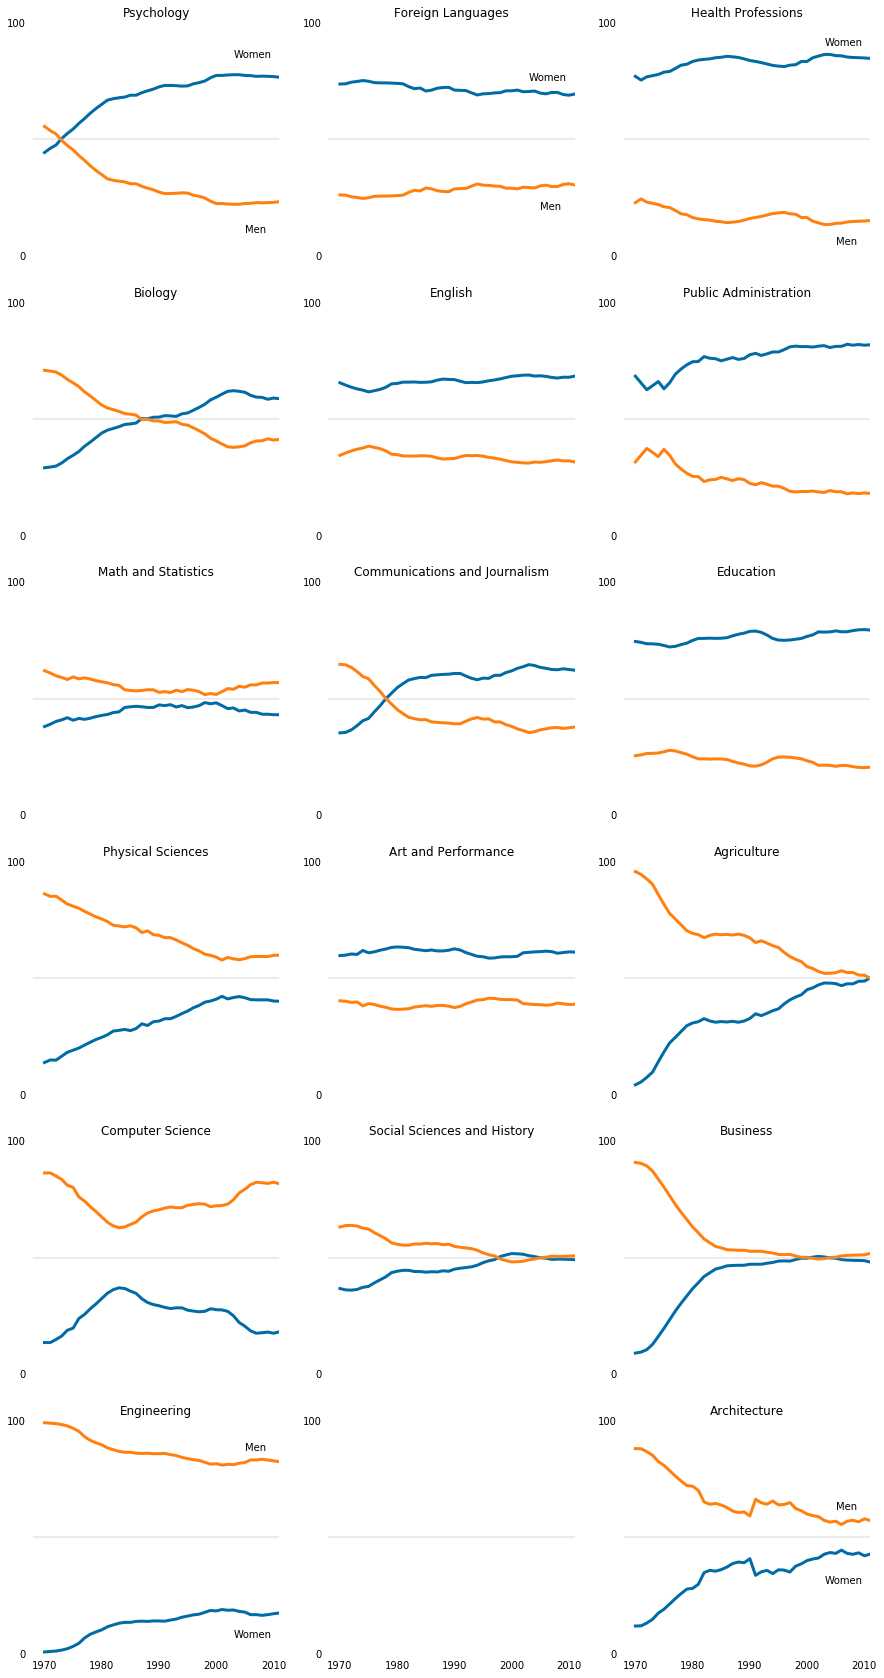

In [6]:
fig = plt.figure(figsize=(15,30))

for sp in range(18):
    s = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    if sp%3==0:
        ax.plot(women_degrees['Year'], women_degrees[stem_cats[s]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[s]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(stem_cats[s])
    elif sp%3==1 and sp!=16:
        ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[s]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[s]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(lib_arts_cats[s])
    elif sp%3==2:
        ax.plot(women_degrees['Year'], women_degrees[other_cats[s]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[s]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(other_cats[s])
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if sp == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp == 15:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    elif sp == 1:
        ax.text(2003, 75, 'Women')
        ax.text(2005, 20, 'Men')
    elif sp == 2:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 17:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
    if sp in [15,16,17]:
        ax.tick_params(labelbottom='on')

fig.savefig("gender_degrees.png")
plt.show()